In [1]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import randint, uniform
import lightgbm as lgb
import warnings



# Exploratory Data Analysis

In [2]:
#loading the training data
Train_df = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/train.csv')



In [3]:
#loading the test data
Test_df = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/test.csv")


Check Data Structure


In [4]:
pd.set_option('display.max_columns', None)
Train_df.head()
# Test_df.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,1.0,0385,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,1.0,0906 0352 0371 0446 1822 0344 0416 0417,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,2.0,0329 1202,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,1.0,0329 1300,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,1.0,0416 0945 1822 0400 0417 0344,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [5]:
#finding info about data features
Train_df.info()
#Test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

In [6]:
pd.set_option('display.max_columns', None)
Test_df.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description
0,1500 LEIGHTON AV,NaN,34.0128,-118.3045,03/03/2020 12:00:00 AM,03/03/2020 12:00:00 AM,2000.0,3.0,Southwest,376.0,2.0,0416 1241 1243 1813 1821 2000,28.0,F,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont
1,100 S NORMANDIE AV,NaN,34.0726,-118.3029,06/01/2020 12:00:00 AM,04/25/2020 12:00:00 AM,1700.0,20.0,Olympic,2014.0,1.0,0344 0394,26.0,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont
2,300 E 111TH ST,NaN,33.9348,-118.2695,08/28/2020 12:00:00 AM,08/27/2020 12:00:00 AM,900.0,18.0,Southeast,1844.0,2.0,1822 0701 1914 0355 1202 0100,62.0,F,B,721.0,HIGH SCHOOL,NaN,NaN,IC,Invest Cont
3,1300 S LA BREA AV,NaN,34.0497,-118.3442,12/23/2020 12:00:00 AM,12/03/2020 12:00:00 AM,2200.0,7.0,Wilshire,765.0,1.0,NaN,0.0,NaN,NaN,108.0,PARKING LOT,NaN,NaN,IC,Invest Cont
4,11000 MORRISON ST,NaN,34.1611,-118.3704,08/30/2020 12:00:00 AM,08/29/2020 12:00:00 AM,130.0,15.0,N Hollywood,1555.0,2.0,1501,37.0,F,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AO,Adult Other


In [7]:
#finding shape of dataset
Train_df.shape , Test_df.shape

((20000, 22), (5000, 21))

Summary Statistics

In [8]:
#Descriptive statistics for numerical columns
Train_df.describe()
# Test_df.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,7335.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,30.135000,297.176950,366.405044
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,21.863645,212.007298,120.485687
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,12.000000,101.000000,312.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000,400.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000,400.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,515.000000


In [9]:
#Check for missing values: Identify columns with missing values and their counts
Train_df.isnull().sum()
#Test_df.isnull().sum

Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64

In [10]:
#no. of unique features
Train_df.nunique()

Location                 12399
Cross_Street              1495
Latitude                  3622
Longitude                 3578
Date_Reported              811
Date_Occurred              366
Time_Occurred              996
Area_ID                     21
Area_Name                   21
Reporting_District_no     1120
Part 1-2                     2
Modus_Operandi           10489
Victim_Age                 100
Victim_Sex                   4
Victim_Descent              17
Premise_Code               217
Premise_Description        216
Weapon_Used_Code            57
Weapon_Description          57
Status                       5
Status_Description           5
Crime_Category               6
dtype: int64

In [11]:
#Data types: Check the data types of each column
Train_df.dtypes

Location                  object
Cross_Street              object
Latitude                 float64
Longitude                float64
Date_Reported             object
Date_Occurred             object
Time_Occurred            float64
Area_ID                  float64
Area_Name                 object
Reporting_District_no    float64
Part 1-2                 float64
Modus_Operandi            object
Victim_Age               float64
Victim_Sex                object
Victim_Descent            object
Premise_Code             float64
Premise_Description       object
Weapon_Used_Code         float64
Weapon_Description        object
Status                    object
Status_Description        object
Crime_Category            object
dtype: object

In [12]:
# checking unique values present in the Victim_Sex column
Train_df.Victim_Sex.unique()

array(['M', 'X', 'F', nan, 'H'], dtype=object)

In [13]:
# checking unique values present in the Victim_Descent column
Train_df.Victim_Descent.unique()

array(['W', 'H', 'B', 'X', nan, 'O', 'A', 'K', 'C', 'F', 'I', 'J', 'Z',
       'V', 'P', 'D', 'U', 'G'], dtype=object)

In [14]:
# checking unique values present in the Victim_Age column
Train_df.Victim_Age.unique()

array([75., 41., 67., 61.,  0., 50., 68., 22., 31., 46., 72., 26., 38.,
       37., 42., 40., 53., 60., 29., 13., 33., 27., 15., 23., 74., 63.,
       78., 51., 44., 34., 69., 36., 52., 25., 49., 48., 32., 18., 35.,
       24., 39., 16., 28., 47., 30., 64., 76.,  5., 58., 45., 57., 19.,
       55., 54., 21., 65., 17., 20., 77., 82., 56., -2., 84., 59., 43.,
        7., 70., 66., 62., 14., 80., 71., 81., 96., 12., 11.,  4., 83.,
       10.,  8.,  6., 88., 86., 73.,  9., 87., 85., 93., 95., 99., 79.,
        3.,  2., 91., 92., 90., 89., 98., -1., 94.])

# Visualization

<Axes: >

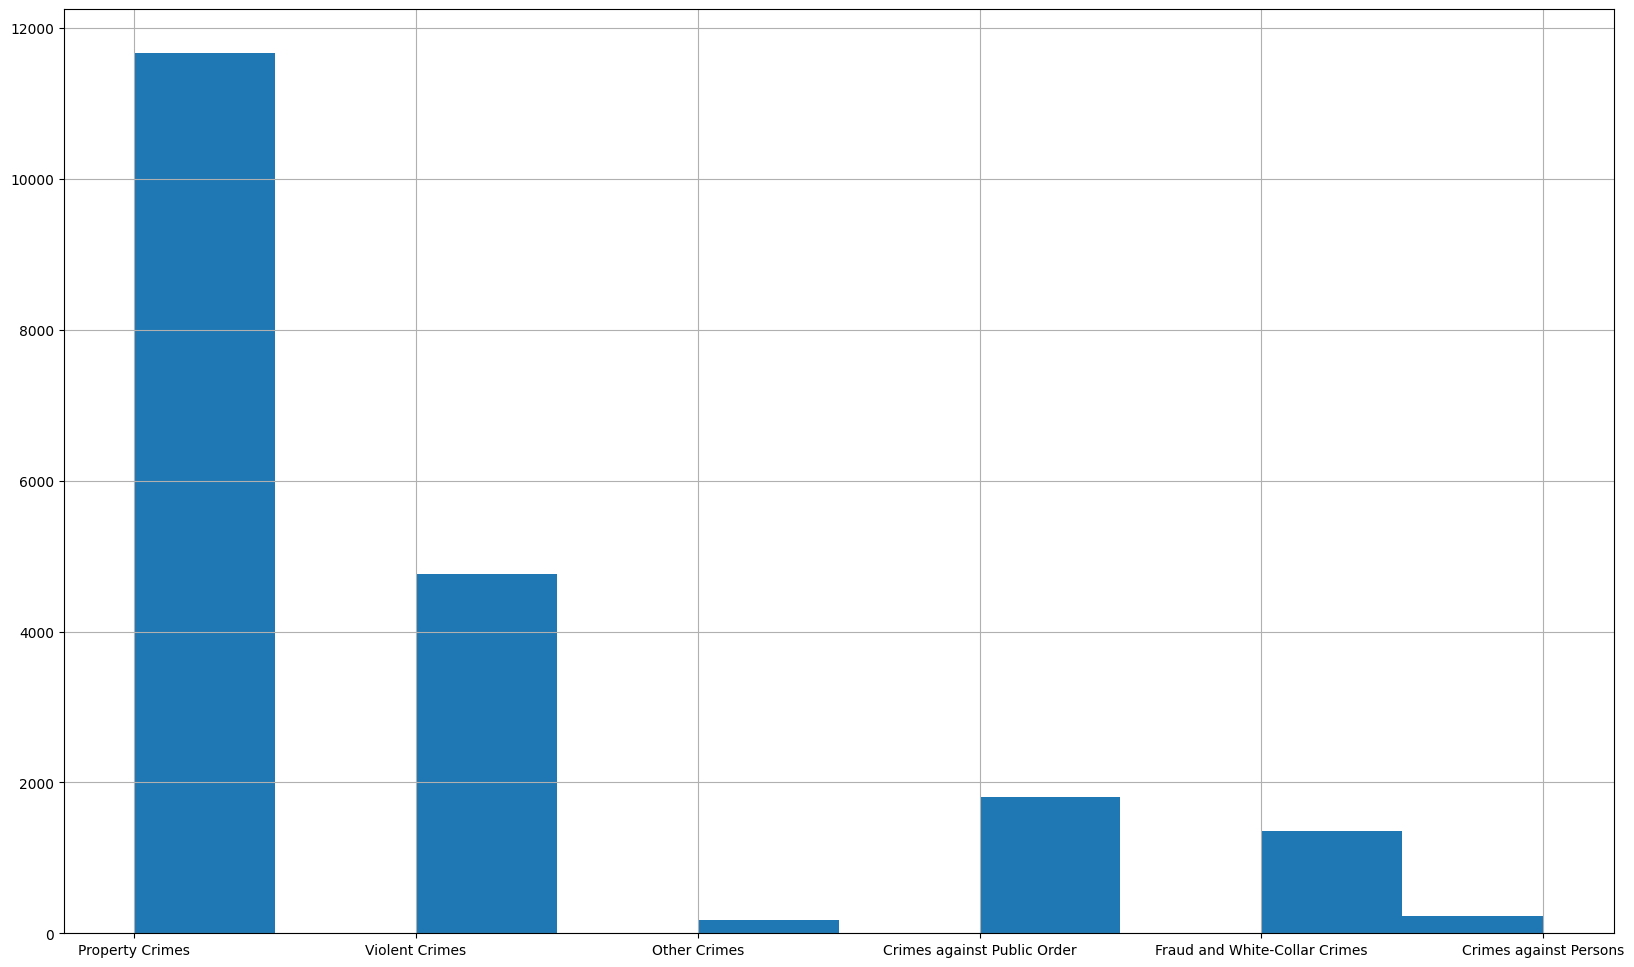

In [15]:
# Plot the histogram for Crime_Category
plt.figure(figsize=(20, 12))  # You can adjust the width and height as needed
Train_df.Crime_Category.hist()  

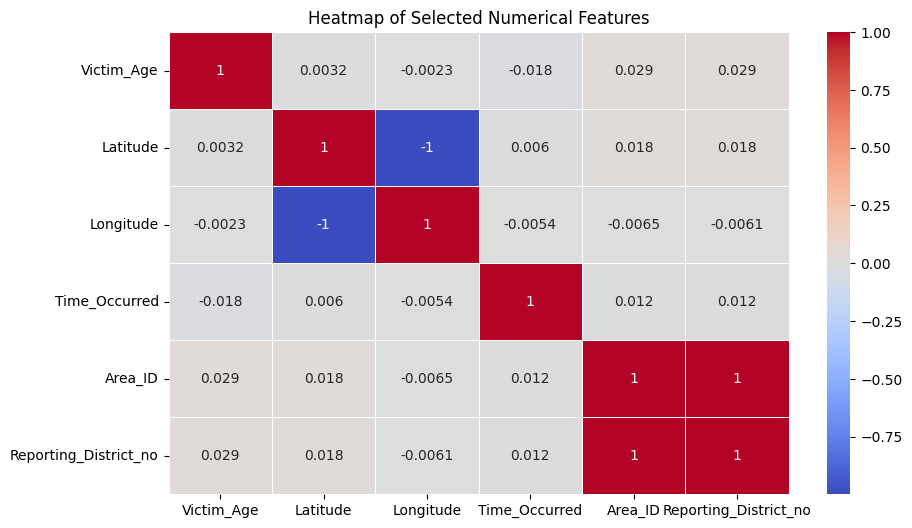

In [16]:
# Select columns for heatmap
selected_columns = ['Victim_Age', 'Latitude', 'Longitude', 'Time_Occurred', 'Area_ID', 'Reporting_District_no']

# Create correlation matrix
correlation_matrix = Train_df[selected_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
#annot=True: Displays numerical data values within the heatmap cells.
#cmap='coolwarm': Sets the color scheme of the heatmap to transition from blue (cool) to red (warm).
#linewidths=0.5: Specifies the width of the lines separating the cells in the heatmap.
plt.title('Heatmap of Selected Numerical Features')
plt.show()

* The heatmap reveals a strong negative correlation between Latitude and Longitude (-1) 
* and a perfect positive correlation between Area_ID and Reporting_District_no (1), indicating redundancy.
* Most other features show weak correlations, suggesting relative independence.

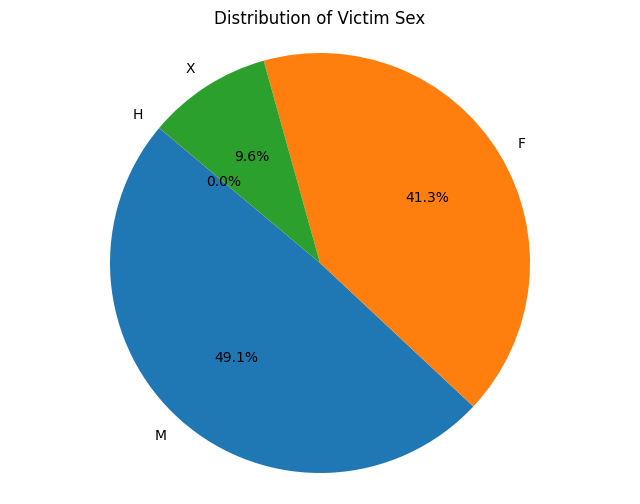

In [17]:
# Victim_Sex pie chart
victim_sex_counts = Train_df['Victim_Sex'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(victim_sex_counts, labels=victim_sex_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Victim Sex')
plt.axis('equal')
plt.show()

* Majority of Victims: The majority of the victims are males.
* Proportion of Female Victims: There is a significant portion of female victims, though less than males.
* Unknown/Other: There is a small fraction of unknown or other categories for victim sex.

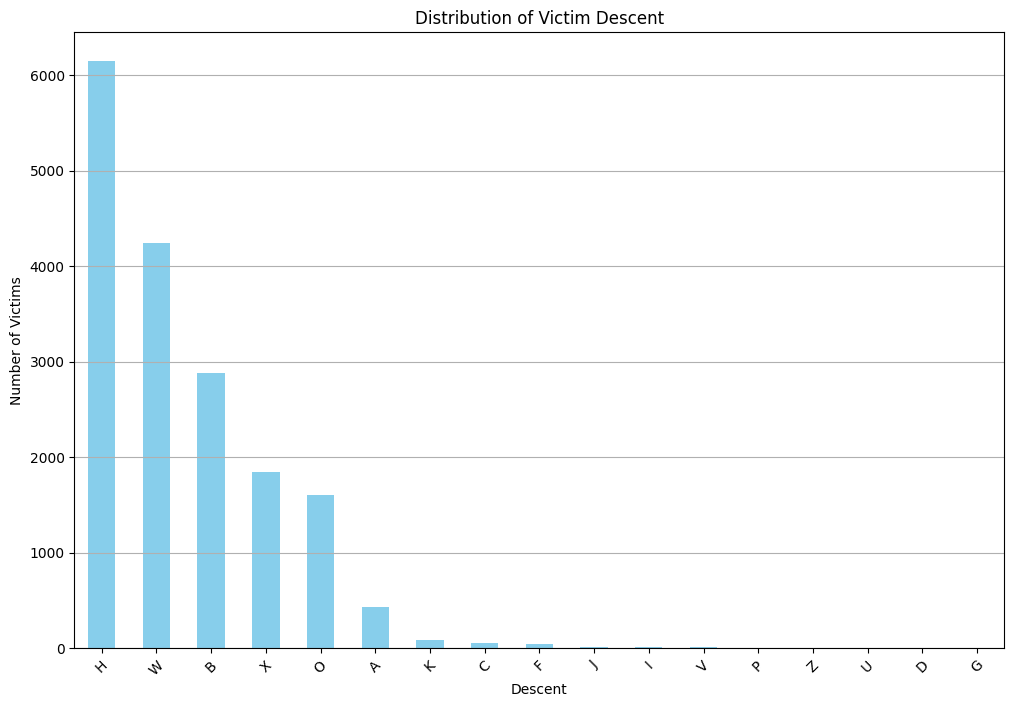

In [18]:
# Count the occurrences of each victim descent
victim_descent_counts = Train_df['Victim_Descent'].value_counts()

# Plot the bar graph
plt.figure(figsize=(12, 8))
victim_descent_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Victim Descent')
plt.xlabel('Descent')
plt.ylabel('Number of Victims')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

* Victim_Descent Pie Chart:
* Predominant Descent Groups: Certain descent groups, such as Hispanic and White, have higher victim counts compared to others.
* Diverse Victim Descent: The victims come from a variety of descent backgrounds, indicating diversity in the affected population.

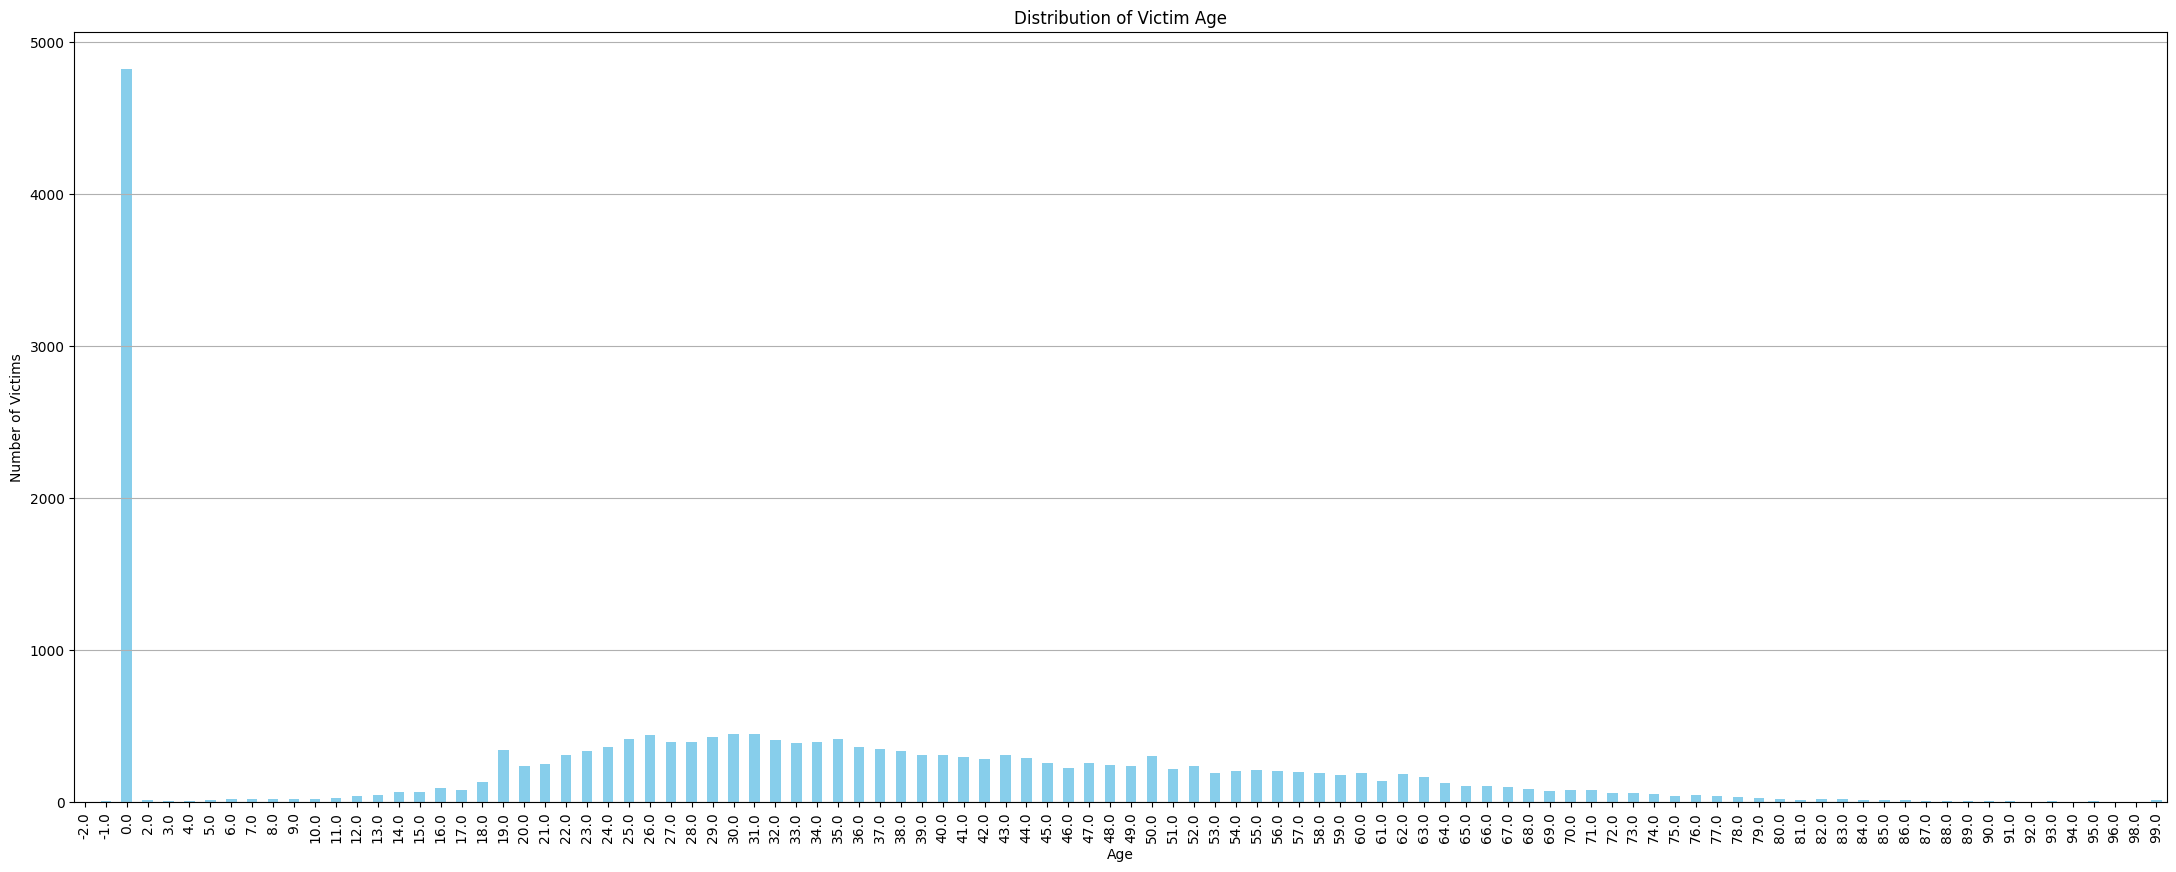

In [19]:
# Count the occurrences of each victim age
victim_age_counts = Train_df['Victim_Age'].value_counts().sort_index()

# Plot the bar graph
plt.figure(figsize=(27, 10))
victim_age_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Victim Age')
plt.xlabel('Age')
plt.ylabel('Number of Victims')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

* Victim_Age Bar Graph:
* Younger Victims: There are peaks in certain age groups, particularly younger adults.
* Middle-Aged Victims: There is a noticeable number of middle-aged victims, showing a spread across a wide range of ages.
* Age Distribution: The distribution is relatively spread out, indicating that victims come from a broad age range.

Bar chart showing the occurrence of accidents across different areas


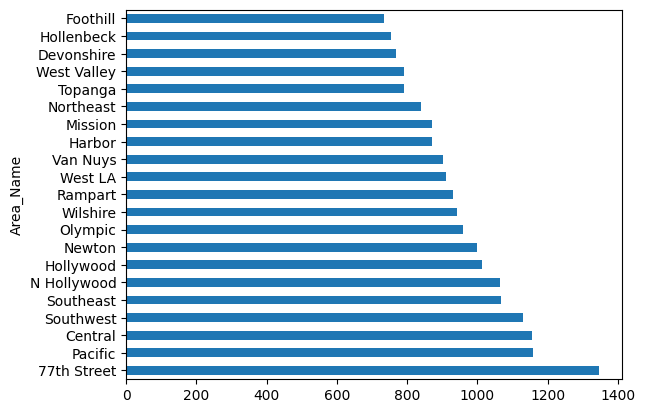

In [20]:
#Bar chart showing the occurrence of accidents across different areas
Train_df["Area_Name"].value_counts().plot(kind = "barh")
print("Bar chart showing the occurrence of accidents across different areas")

77th Street is the area with the highest number of crimes, exceeding 1300 incidents.

Text(0.5, 1.0, 'Counts of Different Statuses')

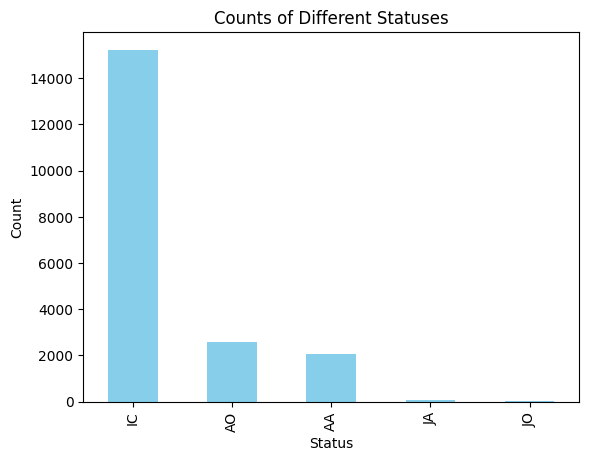

In [21]:
value_counts = Train_df["Status"].value_counts()

# Convert the value counts to a DataFrame to ensure proper numeric format
value_counts = value_counts.to_frame()

# Reset the index to turn the index into a column
value_counts.reset_index(inplace=True)

# Rename the columns for clarity
value_counts.columns = ['Status', 'Count']

# Plot a vertical bar chart
value_counts.plot(kind='bar', x='Status', y='Count', color='skyblue', legend=False)

# Add labels and title
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Counts of Different Statuses')


From these statuses, we can infer the following distribution of people involved in crimes:

* IC (Incarcerated): 15,236 individuals, indicating a high number of people who were jailed.
* AO (Active Offender): 2,597 individuals, suggesting a significant number of individuals currently engaged in criminal activities.
* AA (Arrested Adult): 2,054 individuals, showing a considerable number of adults who were arrested.
* JA (Juvenile Arrested): 70 individuals, indicating a smaller number of juveniles who were arrested.
* JO (Juvenile Offender): 43 individuals, representing a minor portion of juveniles involved in offenses.
This distribution highlights that the majority of individuals involved in crimes are incarcerated, with active offenders and arrested adults also making up significant portions. Juveniles, both arrested and offenders, constitute a much smaller percentage.


# Data Cleaning 

In [22]:
#dropping unnecessary text columns from training and test data set
Train_df.drop(inplace = True , columns= ['Cross_Street' , 'Weapon_Description', 'Status' , 'Area_Name' , 'Reporting_District_no' , 'Premise_Code'])
Test_df.drop(inplace = True , columns= ['Cross_Street' , 'Weapon_Description', 'Status' , 'Area_Name' , 'Reporting_District_no' , 'Premise_Code'])

In [23]:
# checking for duplicate rows
Train_df.duplicated().value_counts()
#Test_df.duplicated().value_counts()

False    19987
True        13
Name: count, dtype: int64

In [24]:
#Replacing -1 ,-2 ,0 with nan value in tain and test date set
Train_df['Victim_Age'].replace([-1, -2, 0], np.nan)
Test_df['Victim_Age'].replace([-1, -2, 0], np.nan)

0       28.0
1       26.0
2       62.0
3        NaN
4       37.0
        ... 
4995     NaN
4996     NaN
4997    38.0
4998    41.0
4999    49.0
Name: Victim_Age, Length: 5000, dtype: float64

# Feature Engineering

In [25]:
# Function to convert time format for train data set
def convert_time(time):
    time = int(time)
    hours = time // 100
    return hours


# Apply the function to the DataFrame
Train_df['Time_Occurred_Formatted'] = Train_df['Time_Occurred'].apply(convert_time)
Train_df.drop(columns=['Time_Occurred'], inplace=True)

print(Train_df['Time_Occurred_Formatted'])

0        18
1        13
2         6
3        18
4        11
         ..
19995     7
19996     2
19997    14
19998     6
19999    18
Name: Time_Occurred_Formatted, Length: 20000, dtype: int64


In [26]:
# Function to convert time format for Test data set
def convert_time(time):
    time = int(time)
    hours = time // 100
    return hours


# Apply the function to the DataFrame
Test_df['Time_Occurred_Formatted'] = Test_df['Time_Occurred'].apply(convert_time)
Test_df.drop(columns=['Time_Occurred'], inplace=True)

print(Test_df['Time_Occurred_Formatted'])

0       20
1       17
2        9
3       22
4        1
        ..
4995    21
4996    15
4997    21
4998    23
4999     3
Name: Time_Occurred_Formatted, Length: 5000, dtype: int64


In [27]:
# Doing this on Train before spliting Train_df into train and test

# Convert date columns to datetime object
Train_df['Date_Reported'] = pd.to_datetime(Train_df['Date_Reported'])
Train_df['Date_Occurred'] = pd.to_datetime(Train_df['Date_Occurred'])

# Extract year, month, day from Date_Reported
#.dt is an accessor object that is used to access attributes of the datetime values in the series.
Train_df['Reported_Year'] = Train_df['Date_Reported'].dt.year
Train_df['Reported_Month'] = Train_df['Date_Reported'].dt.month
Train_df['Reported_Day'] = Train_df['Date_Reported'].dt.day

# Extract year, month, day from Date_Occurred
Train_df['Occurred_Year'] = Train_df['Date_Occurred'].dt.year
Train_df['Occurred_Month'] = Train_df['Date_Occurred'].dt.month
Train_df['Occurred_Day'] = Train_df['Date_Occurred'].dt.day

# Drop the original date columns
Train_df = Train_df.drop(columns=['Date_Reported', 'Date_Occurred'])

# Display the first few rows to verify the new features
# print(Train_df[['Reported_Year', 'Reported_Month', 'Reported_Day', 'Occurred_Year', 'Occurred_Month', 'Occurred_Day']].head())



/tmp/ipykernel_18/4082364973.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Train_df['Date_Reported'] = pd.to_datetime(Train_df['Date_Reported'])
/tmp/ipykernel_18/4082364973.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Train_df['Date_Occurred'] = pd.to_datetime(Train_df['Date_Occurred'])


In [28]:
# Doing this Test data before spliting Train_df into train and test

# Convert date columns to datetime object
Test_df['Date_Reported'] = pd.to_datetime(Test_df['Date_Reported'])
Test_df['Date_Occurred'] = pd.to_datetime(Test_df['Date_Occurred'])

# Extract year, month, day from Date_Reported
#.dt is an accessor object that is used to access attributes of the datetime values in the series.
Test_df['Reported_Year'] = Test_df['Date_Reported'].dt.year
Test_df['Reported_Month'] = Test_df['Date_Reported'].dt.month
Test_df['Reported_Day'] = Test_df['Date_Reported'].dt.day

# Extract year, month, day from Date_Occurred
Test_df['Occurred_Year'] = Test_df['Date_Occurred'].dt.year
Test_df['Occurred_Month'] = Test_df['Date_Occurred'].dt.month
Test_df['Occurred_Day'] = Test_df['Date_Occurred'].dt.day

# Drop the original date columns
Test_df = Test_df.drop(columns=['Date_Reported', 'Date_Occurred'])

# Display the first few rows to verify the new features
# print(Test_df[['Reported_Year', 'Reported_Month', 'Reported_Day', 'Occurred_Year', 'Occurred_Month', 'Occurred_Day']].head())



/tmp/ipykernel_18/2303020900.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Test_df['Date_Reported'] = pd.to_datetime(Test_df['Date_Reported'])
/tmp/ipykernel_18/2303020900.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Test_df['Date_Occurred'] = pd.to_datetime(Test_df['Date_Occurred'])


In [29]:
pd.set_option('display.max_columns', None)
Train_df.head(10)
# Test_df.head(10)

,Location,Latitude,Longitude,Area_ID,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Description,Weapon_Used_Code,Status_Description,Crime_Category,Time_Occurred_Formatted,Reported_Year,Reported_Month,Reported_Day,Occurred_Year,Occurred_Month,Occurred_Day
0,4500 CARPENTER AV,34.1522,-118.3910,15.0,1.0,0385,75.0,M,W,STREET,NaN,Invest Cont,Property Crimes,18,2020,3,9,2020,3,6
1,45TH ST,34.0028,-118.2391,13.0,1.0,0906 0352 0371 0446 1822 0344 0416 0417,41.0,M,H,SWAP MEET,400.0,Invest Cont,Property Crimes,13,2020,2,27,2020,2,27
2,600 E MARTIN LUTHER KING JR BL,34.0111,-118.2653,13.0,2.0,0329 1202,67.0,M,B,SINGLE FAMILY DWELLING,NaN,Invest Cont,Property Crimes,6,2020,8,21,2020,8,21
3,14900 ORO GRANDE ST,34.2953,-118.4590,19.0,1.0,0329 1300,61.0,M,H,STREET,NaN,Invest Cont,Property Crimes,18,2020,11,8,2020,11,6
4,7100 S VERMONT AV,33.9787,-118.2918,12.0,1.0,0416 0945 1822 0400 0417 0344,0.0,X,X,MINI-MART,400.0,Invest Cont,Property Crimes,11,2020,2,25,2020,2,25
5,300 N AVENUE 57,34.1127,-118.1942,11.0,2.0,0446 0416,50.0,M,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,Adult Other,Violent Crimes,2,2020,1,10,2020,1,10
6,1600 N SOTO ST,34.0623,-118.1980,4.0,1.0,0325,0.0,X,X,LIQUOR STORE,NaN,Invest Cont,Property Crimes,18,2020,8,17,2020,8,17
7,12600 BRADDOCK DR,33.9864,-118.4239,14.0,1.0,1606 0344,68.0,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,Property Crimes,11,2021,10,7,2020,3,19
8,5500 COLDWATER CA AV,34.1781,-118.4179,9.0,1.0,NaN,0.0,NaN,NaN,DRIVEWAY,NaN,Invest Cont,Property Crimes,16,2020,1,28,2020,1,26
9,11500 AVIATION BL,33.9298,-118.3784,14.0,2.0,0329 1300 1402,22.0,F,H,PARKING LOT,NaN,Adult Arrest,Property Crimes,4,2020,7,7,2020,7,7


# Preprocessing and Pipelining 

* In summary, handle_unknown='ignore' ensures that the OneHotEncoder can handle unseen categories in the test data without errors,
making the pipeline more robust and flexible.
* A Pipeline is a sequence of data processing steps, each represented by a tuple containing a name and a transformer or estimator.

In [30]:
# Define individual pipelines for each feature type
latitude_and_longitude_pipeline = Pipeline(steps=[
    ("lat_long_scaler", StandardScaler())
])

area_id_part12_pipeline = Pipeline(steps=[
    ('areaid_part12_encoder', OneHotEncoder(handle_unknown='ignore'))
])

victim_age_pipeline = Pipeline(steps=[
     ("victim_age_imputer", SimpleImputer(strategy="mean")),  # For numeric age data
     ("victim_age_scaler", StandardScaler())
])
victim_sex_descent_premise_dis_weapon_use_pipeline = Pipeline(steps=[
   
    ("victim_sex_des_premise_dis_weapon_use_imputer", SimpleImputer(strategy="most_frequent")),  # For categorical data
    ("victim_sex_des_premise_dis_weapon_use_encoder",  OneHotEncoder(handle_unknown='ignore')),

])

status_dis_pipeline = Pipeline(steps=[
    ("status_dis_encoder", OneHotEncoder(handle_unknown='ignore'))
])

In [31]:
#A ColumnTransformer named preprocessor_1, which applies different preprocessing pipelines to specific subsets of columns in our DataFrame
Date_reported_occurred = ['Reported_Year', 'Reported_Month', 'Reported_Day',
                          'Occurred_Year', 'Occurred_Month', 'Occurred_Day', 'Time_Occurred_Formatted']

preprocessor_1 = ColumnTransformer(
    transformers=[
        ('date_reported_occurred', FunctionTransformer(lambda col: col), Date_reported_occurred),
        ('latitude_and_longitude', latitude_and_longitude_pipeline, ["Latitude", "Longitude"]),
        ('area_id_part12', area_id_part12_pipeline, ["Area_ID", "Part 1-2"]),
        ('Victim_age' , victim_age_pipeline ,['Victim_Age']),
        ('Victim_Sex_Descent_Premise_Dis_Weapon_use', victim_sex_descent_premise_dis_weapon_use_pipeline,
         ["Victim_Sex", "Victim_Descent", "Premise_Description", "Weapon_Used_Code"]),
        ('status_dis', status_dis_pipeline, ["Status_Description"])
    ],
    remainder="drop"
)

preprocessor_1


ColumnTransformer(transformers=[('date_reported_occurred',
                                 FunctionTransformer(func=<function <lambda> at 0x794485f05120>),
                                 ['Reported_Year', 'Reported_Month',
                                  'Reported_Day', 'Occurred_Year',
                                  'Occurred_Month', 'Occurred_Day',
                                  'Time_Occurred_Formatted']),
                                ('latitude_and_longitude',
                                 Pipeline(steps=[('lat_long_scaler',
                                                  StandardScaler())]),
                                 ['Latitude', 'Longitude'])...
                                 Pipeline(steps=[('victim_sex_des_premise_dis_weapon_use_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('victim_sex_des_premise_dis_weapon_use_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Victim_Sex', 'Victim_Descent',
                                  'Premise_Description', 'Weapon_Used_Code']),
                                ('status_dis',
                                 Pipeline(steps=[('status_dis_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Status_Description'])])

In [32]:
# Initializing the SimpleImputer to fill missing values with the most frequent value
modus_op = SimpleImputer(strategy='most_frequent')
# Applying the imputer to the 'Modus_Operandi' column in the training dataframe and flattening the result to convert it from 2D to 1D
Train_df['Modus_Operandi'] = modus_op.fit_transform(Train_df[['Modus_Operandi']]).flatten() # converting 2D array into 1D array
# Applying the imputer to the 'Modus_Operandi' column in the testing dataframe and flattening the result to convert it from 2D to 1D
Test_df['Modus_Operandi'] = modus_op.transform(Test_df[['Modus_Operandi']]).flatten()

In [33]:
# Prepare additional transformations for "Location" and "Modus_Operandi" features
Location_Modus = ColumnTransformer(transformers = [
    ("location_vectorizer", CountVectorizer() , "Location"),
    ("Modus_vectorizer", CountVectorizer() , "Modus_Operandi")
])
Location_Modus

ColumnTransformer(transformers=[('location_vectorizer', CountVectorizer(),
                                 'Location'),
                                ('Modus_vectorizer', CountVectorizer(),
                                 'Modus_Operandi')])

In [34]:
# Combine all preprocessors
combined_preprecessor = ColumnTransformer(transformers = [
    ('location_modus' , Location_Modus , ['Location' , 'Modus_Operandi']),
    ("Preprocessor" , preprocessor_1 , [ 'Reported_Year', 'Reported_Month', 'Reported_Day','Occurred_Year', 'Occurred_Month', 'Occurred_Day',
                                        'Time_Occurred_Formatted',"Latitude" , "Longitude","Area_ID" ,"Part 1-2" , "Victim_Age" ,"Victim_Sex" , 
                                         "Victim_Descent" , "Premise_Description" , "Weapon_Used_Code" , "Status_Description"])
])

combined_preprecessor

ColumnTransformer(transformers=[('location_modus',
                                 ColumnTransformer(transformers=[('location_vectorizer',
                                                                  CountVectorizer(),
                                                                  'Location'),
                                                                 ('Modus_vectorizer',
                                                                  CountVectorizer(),
                                                                  'Modus_Operandi')]),
                                 ['Location', 'Modus_Operandi']),
                                ('Preprocessor',
                                 ColumnTransformer(transformers=[('date_reported_occurred',
                                                                  FunctionTransformer(func=<function <lambda> at 0x794485...
                                                                  Pipeline(steps=[('status_dis_encoder',
                                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                                  ['Status_Description'])]),
                                 ['Reported_Year', 'Reported_Month',
                                  'Reported_Day', 'Occurred_Year',
                                  'Occurred_Month', 'Occurred_Day',
                                  'Time_Occurred_Formatted', 'Latitude',
                                  'Longitude', 'Area_ID', 'Part 1-2',
                                  'Victim_Age', 'Victim_Sex', 'Victim_Descent',
                                  'Premise_Description', 'Weapon_Used_Code',
                                  'Status_Description'])])

# Dummy Model

In [35]:
# Dropping the target column 'Crime_Category' from the training dataframe to create the feature matrix 'X'
X = Train_df.drop('Crime_Category', axis = 'columns')
# Extracting the target column 'Crime_Category' to create the target vector 'y'
y = Train_df['Crime_Category']

y.head()

0    Property Crimes
1    Property Crimes
2    Property Crimes
3    Property Crimes
4    Property Crimes
Name: Crime_Category, dtype: object

In [36]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

In [37]:
from sklearn.preprocessing import LabelEncoder

from sklearn.dummy import DummyClassifier

In [38]:
model = DummyClassifier(strategy = 'most_frequent')
model.fit(X_train, y_train)

model.predict(X_val.iloc[0 : 1])

X_val.iloc[0:1]


sample = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv')
sample.head()

X_test = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/test.csv')
X_test.head()

y_pred = model.predict(X_test)

X_test.shape

submission = pd.DataFrame({"ID": np.arange(1, 5001),
                             "Crime_Category": y_pred,
                          }
                         )
submission.to_csv('submission.csv', index=False)

# print(5000*[np.NaN])


# XGBoost Model

In [39]:
# Define the final pipeline
final_pipeline = Pipeline(steps = [
    ("combined_preprocessor" , combined_preprecessor),
    ("classifier", xgb.XGBClassifier())
])
# final_pipeline

* n_estimators: Determines the number of trees in the model; more trees can improve performance but may increase overfitting.
* max_depth: Sets the maximum depth of each tree; deeper trees capture more complexity but may overfit.
* learning_rate: Controls the contribution of each tree; lower values improve robustness but require more trees.
* subsample: Controls the fraction of samples used for each tree; lower values help prevent overfitting.
* colsample_bytree: Controls the fraction of features sampled for each tree; reducing this enhances model robustness.
* gamma: Specifies the minimum loss reduction to make a split; higher values lead to more conservative splits.
* reg_lambda: Applies L2 regularization on weights; higher values reduce overfitting.

In [40]:
# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'classifier__n_estimators': randint(100, 1000),
    'classifier__max_depth': randint(3, 15),
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.3],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__colsample_bytree': [0.6, 0.8, 1.0],
    'classifier__gamma': randint(0, 5),
    'classifier__reg_lambda': [0, 0.1, 1, 10]
}

In [41]:
# Initialize RandomizedSearchCV with more iterations
random_search = RandomizedSearchCV(estimator=final_pipeline, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)


In [42]:
# Dropping the target column 'Crime_Category' from the training dataframe to create the feature matrix 'X'
X = Train_df.drop('Crime_Category', axis=1)
# Extracting the target column 'Crime_Category' to create the target vector 'y'
y = Train_df['Crime_Category']
# Initializing the label encoder
label_encoder = LabelEncoder()
# Encoding the target labels to integer values
y = label_encoder.fit_transform(y)

In [43]:
# Splitting the data into training and testing sets with 80% of the data used for training and 20% for testing
# The random_state parameter ensures reproducibility of the split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)



In [44]:
# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('combined_preprocessor',
                                              ColumnTransformer(transformers=[('location_modus',
                                                                               ColumnTransformer(transformers=[('location_vectorizer',
                                                                                                                CountVectorizer(),
                                                                                                                'Location'),
                                                                                                               ('Modus_vectorizer',
                                                                                                                CountVectorizer(),
                                                                                                                'Modus_Operandi')]),
                                                                               ['Location',
                                                                                'Modus_Operandi']),
                                                                              ('Preprocessor',
                                                                               ColumnTransformer(transformers=[('d...
                                        'classifier__learning_rate': [0.01,
                                                                      0.05, 0.1,
                                                                      0.3],
                                        'classifier__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7944860eef50>,
                                        'classifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x794485f24190>,
                                        'classifier__reg_lambda': [0, 0.1, 1,
                                                                   10],
                                        'classifier__subsample': [0.6, 0.8,
                                                                  1.0]},
                   random_state=42, scoring='accuracy')

In [45]:
# Get the best model from RandomizedSearchCV
selected_model = random_search.best_estimator_
best_model = selected_model


In [46]:
# Predict and prepare the submission file
y_pred = best_model.predict(Test_df)
y_pred = label_encoder.inverse_transform(y_pred)
submission = pd.DataFrame({"ID": np.arange(1, 5001), "Crime_Category": y_pred})
submission.to_csv('submission.csv', index=False)

In [47]:
# Print the best parameters and best score
print(f'Best parameters (RandomizedSearchCV): {random_search.best_params_}')
print(f'Best accuracy (RandomizedSearchCV): {random_search.best_score_:.3f}')

Best parameters (RandomizedSearchCV): {'classifier__colsample_bytree': 0.6, 'classifier__gamma': 1, 'classifier__learning_rate': 0.05, 'classifier__max_depth': 14, 'classifier__n_estimators': 261, 'classifier__reg_lambda': 0.1, 'classifier__subsample': 0.8}
Best accuracy (RandomizedSearchCV): 0.955


Best parameters (RandomizedSearchCV): {'classifier__colsample_bytree': 0.6, 'classifier__gamma': 1, 'classifier__learning_rate': 0.05, 'classifier__max_depth': 14, 'classifier__n_estimators': 261, 'classifier__reg_lambda': 0.1, 'classifier__subsample': 0.8}
Best accuracy (RandomizedSearchCV): 0.955

# RandomForestClassifier

In [48]:
# Define the final pipeline
final_pipeline = Pipeline(steps=[
    ("combined_preprocessor", combined_preprecessor),
    ("classifier", RandomForestClassifier())
])

* n_estimators: Specifies the number of trees; more trees improve performance but increase computation time.

* max_depth: Determines maximum tree depth; deeper trees capture more complexity but may overfit.

* min_samples_split: Sets the minimum number of samples to split a node; higher values help control overfitting.

* min_samples_leaf: Defines the minimum number of samples at a leaf node; higher values prevent overfitting and ensure reliable estimates.

In [49]:
# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'classifier__n_estimators': randint(100, 500),
    'classifier__max_depth': [None, 10, 20, 30, 40, 50],
    'classifier__min_samples_split': randint(2, 11),
    'classifier__min_samples_leaf': randint(1, 5)
}

In [50]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=final_pipeline, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('combined_preprocessor',
                                              ColumnTransformer(transformers=[('location_modus',
                                                                               ColumnTransformer(transformers=[('location_vectorizer',
                                                                                                                CountVectorizer(),
                                                                                                                'Location'),
                                                                                                               ('Modus_vectorizer',
                                                                                                                CountVectorizer(),
                                                                                                                'Modus_Operandi')]),
                                                                               ['Location',
                                                                                'Modus_Operandi']),
                                                                              ('Preprocessor',
                                                                               ColumnTransformer(transformers=[('d...
                                        'classifier__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x794485f81e70>,
                                        'classifier__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x794482c30070>,
                                        'classifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x794485f27be0>},
                   random_state=42, scoring='accuracy')

In [51]:
# Get the best model from RandomizedSearchCV
selected_model = random_search.best_estimator_
best_model = selected_model

In [52]:
# Evaluate the model on the validation set (X_test)
y_pred_test = best_model.predict(X_test)

In [53]:
# Decode the predicted and true labels
y_pred_test_decoded = label_encoder.inverse_transform(y_pred_test)
y_test_decoded = label_encoder.inverse_transform(y_test)

In [54]:
# Print the classification report
print('Classification Report:')
print(classification_report(y_test_decoded, y_pred_test_decoded, digits=4))

Classification Report:
                               precision    recall  f1-score   support

       Crimes against Persons     0.5000    0.0938    0.1579        32
  Crimes against Public Order     0.9000    0.6979    0.7861       374
Fraud and White-Collar Crimes     0.9560    0.8951    0.9246       267
                 Other Crimes     1.0000    0.0571    0.1081        35
              Property Crimes     0.9721    0.9835    0.9778      2303
               Violent Crimes     0.8601    0.9757    0.9143       989

                     accuracy                         0.9337      4000
                    macro avg     0.8647    0.6172    0.6448      4000
                 weighted avg     0.9331    0.9337    0.9264      4000



Classification Report:
                               precision    recall  f1-score   support

       Crimes against Persons     0.4000    0.0625    0.1081        32
  Crimes against Public Order     0.8997    0.6952    0.7843       374
Fraud and White-Collar Crimes     0.9490    0.9064    0.9272       267
                 Other Crimes     1.0000    0.0571    0.1081        35
              Property Crimes     0.9747    0.9861    0.9804      2303
               Violent Crimes     0.8642    0.9778    0.9175       989

                     accuracy                         0.9360      4000
                    macro avg     0.8479    0.6142    0.6376      4000
                 weighted avg     0.9343    0.9360    0.9283      4000

In [55]:
# Print the confusion matrix
conf_matrix = confusion_matrix(y_test_decoded, y_pred_test_decoded)
print('Confusion Matrix:')
print(conf_matrix)


Confusion Matrix:
[[   3    4    1    0    0   24]
 [   1  261    5    0   25   82]
 [   0   13  239    0   10    5]
 [   0    6    3    2   15    9]
 [   0    0    1    0 2265   37]
 [   2    6    1    0   15  965]]


Confusion Matrix:
[[   2    4    1    0    0   25]
 [   1  260    6    0   22   85]
 [   0   13  242    0    9    3]
 [   0    6    3    2   15    9]
 [   0    0    2    0 2271   30]
 [   2    6    1    0   13  967]]

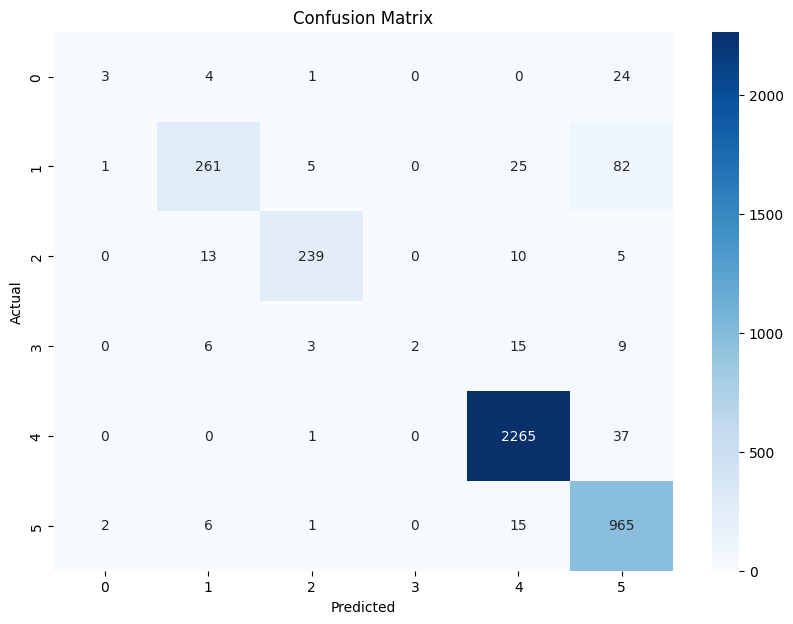

In [56]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [57]:
# Predict and prepare the submission file
y_pred_submission = best_model.predict(Test_df)
y_pred_submission_decoded = label_encoder.inverse_transform(y_pred_submission)
submission = pd.DataFrame({"ID": np.arange(1, 5001), "Crime_Category": y_pred})
submission.to_csv('submission.csv', index=False)


In [58]:
# Get the best parameters and best score from RandomizedSearchCV
print(f'Best parameters (RandomizedSearchCV): {random_search.best_params_}')
print(f'Best accuracy (RandomizedSearchCV): {random_search.best_score_:.3f}')

Best parameters (RandomizedSearchCV): {'classifier__max_depth': 50, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 3, 'classifier__n_estimators': 443}
Best accuracy (RandomizedSearchCV): 0.935


Best parameters (RandomizedSearchCV): {'classifier__max_depth': 50, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 3, 'classifier__n_estimators': 443}
Best accuracy (RandomizedSearchCV): 0.935

# LightGBM 

In [59]:
# Suppress LightGBM warnings
warnings.filterwarnings('ignore', category=UserWarning, module='lightgbm')

In [60]:
# Define the final pipeline
final_pipeline = Pipeline(steps=[
    ("combined_preprocessor", combined_preprecessor),
    ("classifier", lgb.LGBMClassifier())
])

* n_estimators: Specifies the number of boosting rounds
* max_depth: Controls the maximum depth of the trees
* learning_rate: Sets the learning rate
* num_leaves: Determines the maximum number of leaves in one tree
* min_child_samples: Specifies the minimum number of samples in a leaf
* subsample: Controls the fraction of samples used for each tree
* colsample_bytree: Controls the fraction of features sampled for each tree

In [61]:
# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'classifier__n_estimators': randint(100, 500),  
    'classifier__max_depth': randint(3, 10),  
    'classifier__learning_rate': uniform(0.01, 0.1),
    'classifier__num_leaves': randint(20, 31), 
    'classifier__min_child_samples': randint(10, 50), 
    'classifier__subsample': uniform(0.6, 0.9),  
    'classifier__colsample_bytree': uniform(0.6, 0.9)  
}


In [62]:
# Initialize RandomizedSearchCV with more iterations
random_search = RandomizedSearchCV(estimator=final_pipeline, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

In [63]:
# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.149910 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1977
[LightGBM] [Info] Number of data points in the train set: 12800, number of used features: 634
[LightGBM] [Info] Start training from score -4.420248
[LightGBM] [Info] Start training from score -2.412295
[LightGBM] [Info] Start training from score -2.688707
[LightGBM] [Info] Start training from score -4.703610
[LightGBM] [Info] Start training from score -0.535876
[LightGBM] [Info] Start training from score -1.443195
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /__w/1/s/lightgbm-python/src/io/config_auto.cpp, line 365 .

[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /__w/1/s/lightgbm-python/src/io/config_auto.cpp, line 365 .

[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /__w/1/s/lightgbm-python/src/io/config_auto.cpp, line 365 .

[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /__w/1/s/lightgbm-python/src/io/config_auto.cpp, line 365 .

[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /__w/1/s/lightgbm-python/src/io/config_auto.cpp, line 365 .

[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /__w/1/s/lightgbm-python/src/io/config_auto.cpp, line 365 .

[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /__w/1/s/lightgbm-python/src/io/config_auto.cpp, line 365 .

[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /__w/1/s/lightgbm-python/src/io/config_auto.cpp, line 365 .



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.183224 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

[LightGBM] [Fatal] Check failed: (feature_fraction) <= (1.0) at /__w/1/s/lightgbm-python/src/io/config_auto.cpp, line 381 .

[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /__w/1/s/lightgbm-python/src/io/config_auto.cpp, line 365 .

[LightGBM] [Fatal] Check failed: (feature_fraction) <= (1.0) at /__w/1/s/lightgbm-python/src/io/config_auto.cpp, line 381 .



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Fatal] Check failed: (feature_fraction) <= (1.0) at /__w/1/s/lightgbm-python/src/io/config_auto.cpp, line 381 .

[LightGBM] [Fatal] Check failed: (feature_fraction) <= (1.0) at /__w/1/s/lightgbm-python/src/io/config_auto.cpp, line 381 .

[LightGBM] [Fatal] Check failed: (feature_fraction) <= (1.0) at /__w/1/s/lightgbm-python/src/io/config_auto.cpp, line 381 .



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Fatal] Check failed: (feature_fraction) <= (1.0) at /__w/1/s/lightgbm-python/src/io/config_auto.cpp, line 381 .

[LightGBM] [Fatal] Check failed: (feature_fraction) <= (1.0) at /__w/1/s/lightgbm-python/src/io/config_auto.cpp, line 381 .

[LightGBM] [Fatal] Check failed: (feature_fraction) <= (1.0) at /__w/1/s/lightgbm-python/src/io/config_auto.cpp, line 381 .



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Fatal] Check failed: (feature_fraction) <= (1.0) at /__w/1/s/lightgbm-python/src/io/config_auto.cpp, line 381 .

[LightGBM] [Fatal] Check failed: (feature_fraction) <= (1.0) at /__w/1/s/lightgbm-python/src/io/config_auto.cpp, line 381 .



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /__w/1/s/lightgbm-python/src/io/config_auto.cpp, line 365 .

[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /__w/1/s/lightgbm-python/src/io/config_auto.cpp, line 365 .



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /__w/1/s/lightgbm-python/src/io/config_auto.cpp, line 365 .

[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /__w/1/s/lightgbm-python/src/io/config_auto.cpp, line 365 .



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /__w/1/s/lightgbm-python/src/io/config_auto.cpp, line 365 .

[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /__w/1/s/lightgbm-python/src/io/config_auto.cpp, line 365 .



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /__w/1/s/lightgbm-python/src/io/config_auto.cpp, line 365 .

[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /__w/1/s/lightgbm-python/src/io/config_auto.cpp, line 365 .



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /__w/1/s/lightgbm-python/src/io/config_auto.cpp, line 365 .

[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /__w/1/s/lightgbm-python/src/io/config_auto.cpp, line 365 .



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /__w/1/s/lightgbm-python/src/io/config_auto.cpp, line 365 .



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /__w/1/s/lightgbm-python/src/io/config_auto.cpp, line 365 .



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /__w/1/s/lightgbm-python/src/io/config_auto.cpp, line 365 .

[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /__w/1/s/lightgbm-python/src/io/config_auto.cpp, line 365 .



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /__w/1/s/lightgbm-python/src/io/config_auto.cpp, line 365 .

[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /__w/1/s/lightgbm-python/src/io/config_auto.cpp, line 365 .



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /__w/1/s/lightgbm-python/src/io/config_auto.cpp, line 365 .

[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /__w/1/s/lightgbm-python/src/io/config_auto.cpp, line 365 .



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /__w/1/s/lightgbm-python/src/io/config_auto.cpp, line 365 .

[LightGBM] [Fatal] Check failed: (bagging_fraction) <= (1.0) at /__w/1/s/lightgbm-python/src/io/config_auto.cpp, line 365 .



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py", line 1187, in fit
    super().fit(
  File "/opt/conda/lib/python3.10/site-packages/lightgbm/sklear

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046349 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2147
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 719
[LightGBM] [Info] Start training from score -4.417654
[LightGBM] [Info] Start training from score -2.412121
[LightGBM] [Info] Start training from score -2.688248
[LightGBM] [Info] Start training from score -4.710531
[LightGBM] [Info] Start training from score -0.535823
[LightGBM] [Info] Start training from score -1.443394
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('combined_preprocessor',
                                              ColumnTransformer(transformers=[('location_modus',
                                                                               ColumnTransformer(transformers=[('location_vectorizer',
                                                                                                                CountVectorizer(),
                                                                                                                'Location'),
                                                                                                               ('Modus_vectorizer',
                                                                                                                CountVectorizer(),
                                                                                                                'Modus_Operandi')]),
                                                                               ['Location',
                                                                                'Modus_Operandi']),
                                                                              ('Preprocessor',
                                                                               ColumnTransformer(transformers=[('d...
                                        'classifier__min_child_samples': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x794486ca22f0>,
                                        'classifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x794485f27220>,
                                        'classifier__num_leaves': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x794486ca2710>,
                                        'classifier__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x794486ca1ab0>},
                   random_state=42, scoring='accuracy')

In [64]:
# Get the best model from RandomizedSearchCV
selected_model = random_search.best_estimator_ 
best_model = selected_model

In [65]:
# Predict and prepare the submission file
y_pred = best_model.predict(Test_df)
y_pred = label_encoder.inverse_transform(y_pred)
submission = pd.DataFrame({"ID": np.arange(1, 5001), "Crime_Category": y_pred})
submission.to_csv('submission.csv', index=False)

In [66]:
# Print the best parameters and best score
print(f'Best parameters (RandomizedSearchCV): {random_search.best_params_ }')
print(f'Best accuracy (RandomizedSearchCV): {random_search.best_score_:.3f}')

Best parameters (RandomizedSearchCV): {'classifier__colsample_bytree': 0.9370861069626262, 'classifier__learning_rate': 0.10507143064099161, 'classifier__max_depth': 5, 'classifier__min_child_samples': 17, 'classifier__n_estimators': 288, 'classifier__num_leaves': 24, 'classifier__subsample': 0.7404167763981928}
Best accuracy (RandomizedSearchCV): 0.954


Best parameters (RandomizedSearchCV): {'classifier__colsample_bytree': 0.9370861069626262, 'classifier__learning_rate': 0.10507143064099161, 'classifier__max_depth': 5, 'classifier__min_child_samples': 17, 'classifier__n_estimators': 288, 'classifier__num_leaves': 24, 'classifier__subsample': 0.7404167763981928}
Best accuracy (RandomizedSearchCV): 0.954

# Comparing and Evaluating the performance of different models

Maximum score: 0.9548, Best model: LightGBM


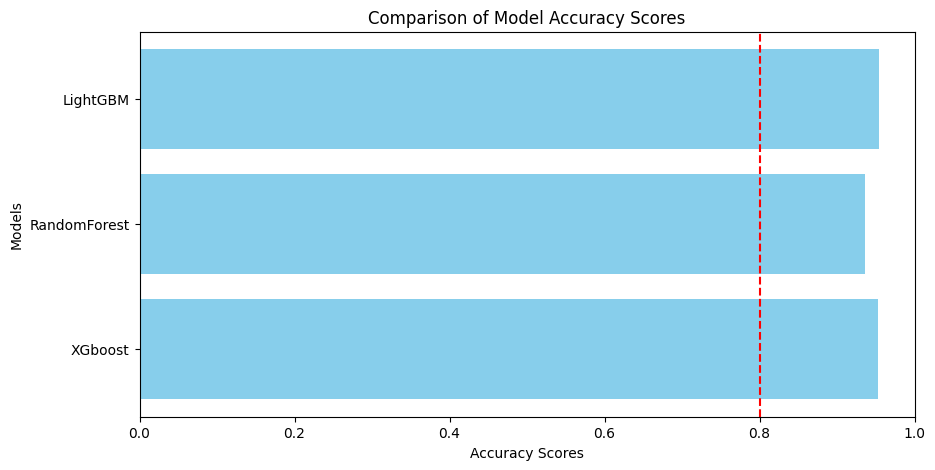

In [67]:
import matplotlib.pyplot as plt
# Names of the models
model_names = ['XGboost', 'RandomForest', 'LightGBM']

# Accuracy scores of the models
model_scores = [0.95260, 0.93600, 0.95480]

# Finding maximum score 
max_score = max(model_scores)

# Finding index of maximum score
max_score_index = model_scores.index(max_score)

# Finding model with the corresponding maximum score
bestmodel = model_names[max_score_index]
print(f"Maximum score: {max_score}, Best model: {bestmodel}")

# Creating a horizontal bar plot
plt.figure(figsize=(10, 5))
plt.barh(model_names, model_scores, color='skyblue') 
plt.xlabel('Accuracy Scores') 
plt.ylabel('Models')
plt.title('Comparison of Model Accuracy Scores')
plt.xlim(0, 1) 

# Drawing a red line at 0.77 accuracy mark to indicate cutoff score
plt.axvline(x=0.8, color='red', linestyle='--') 
plt.show()